In [33]:
library(ggplot2)
library(raster)
library(directlabels)

# Whole U.S.

In [34]:
grid_df <- read.csv('/home/jeremy/tornadoesr/data/raw/grid_with_expected_values.csv')
cities_df <- read.csv('/home//jeremy/tornadoesr/data/raw/cities_with_expected_values.csv')

old_df <- read.csv('/home/jeremy/tornadoesr/data/raw/tor_data_inflation_adj.csv')

lat_mu <- mean(old_df$BEGIN_LAT)
lon_mu <- mean(old_df$BEGIN_LON)
lat_sd <- sd(old_df$BEGIN_LAT)
lon_sd <- sd(old_df$BEGIN_LON)

grid_df$BEGIN_LON <- grid_df$BEGIN_LON*lon_sd+lon_mu
grid_df$BEGIN_LAT <- grid_df$BEGIN_LAT*lat_sd+lat_mu
cities_df$BEGIN_LON <- cities_df$BEGIN_LON*lon_sd+lon_mu
cities_df$BEGIN_LAT <- cities_df$BEGIN_LAT*lat_sd+lat_mu

In [35]:
sub_grid_df <- grid_df[grid_df$JULIAN_DAY == unique(grid_df$JULIAN_DAY)[12], ]
sub_cities_df <- cities_df[cities_df$JULIAN_DAY == unique(grid_df$JULIAN_DAY)[12], ]

pred_df <- rbind(sub_grid_df, sub_cities_df)

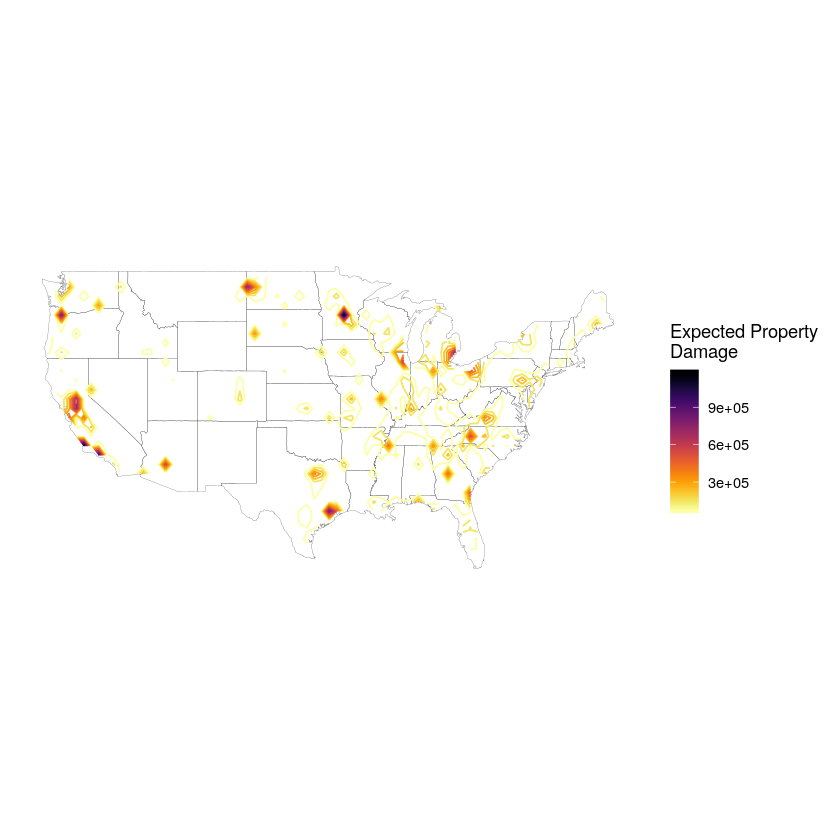

In [36]:
states <- map_data("state")

ggplot(data = states) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.05) +
  viridis::scale_color_viridis('Expected Property\nDamage', direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  stat_contour(data = sub_grid_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       z = DAMAGE_PROPERTY,
                                       colour = ..level..),
               bins = 15) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank())

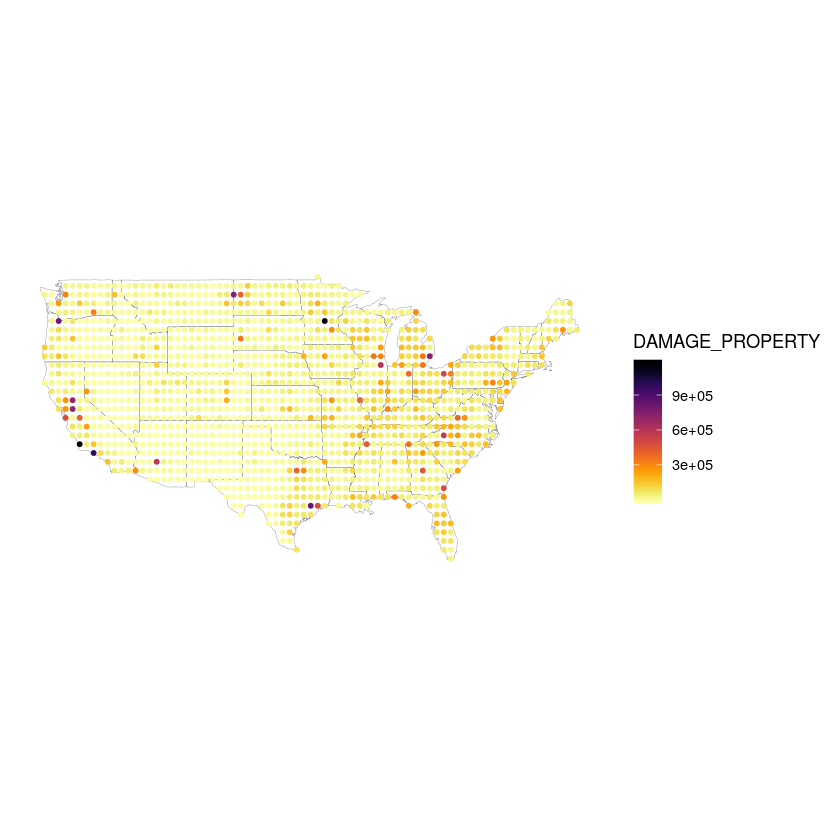

In [37]:
ggplot(data = states) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.05) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = sub_grid_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       color = DAMAGE_PROPERTY),
               size = 1) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank())

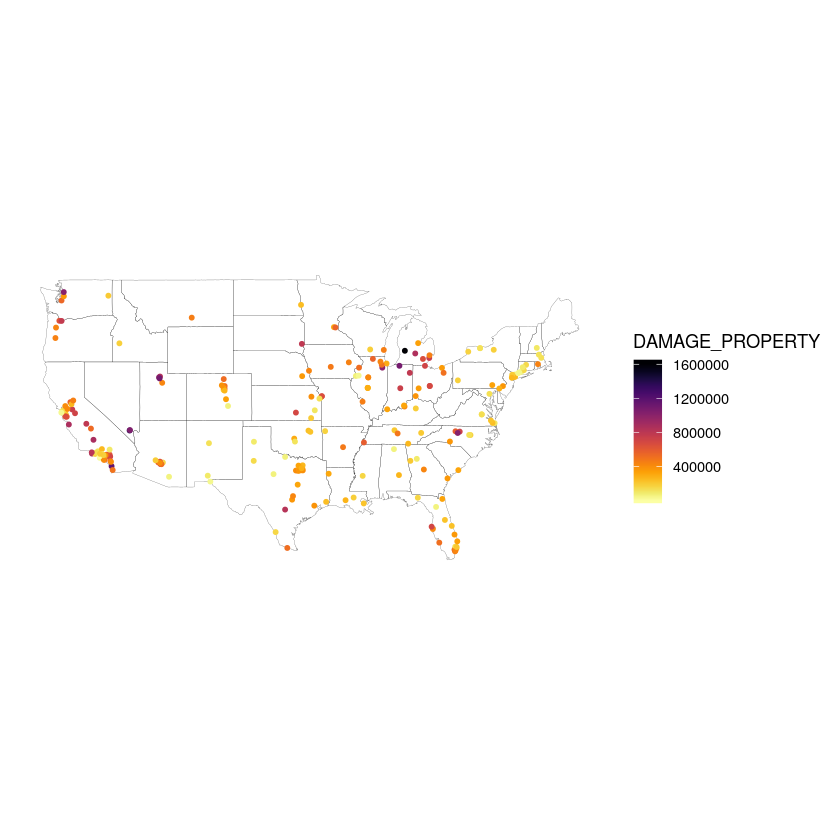

In [38]:
ggplot(data = states) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.05) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = sub_cities_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       color = DAMAGE_PROPERTY),
               size = 1) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank())

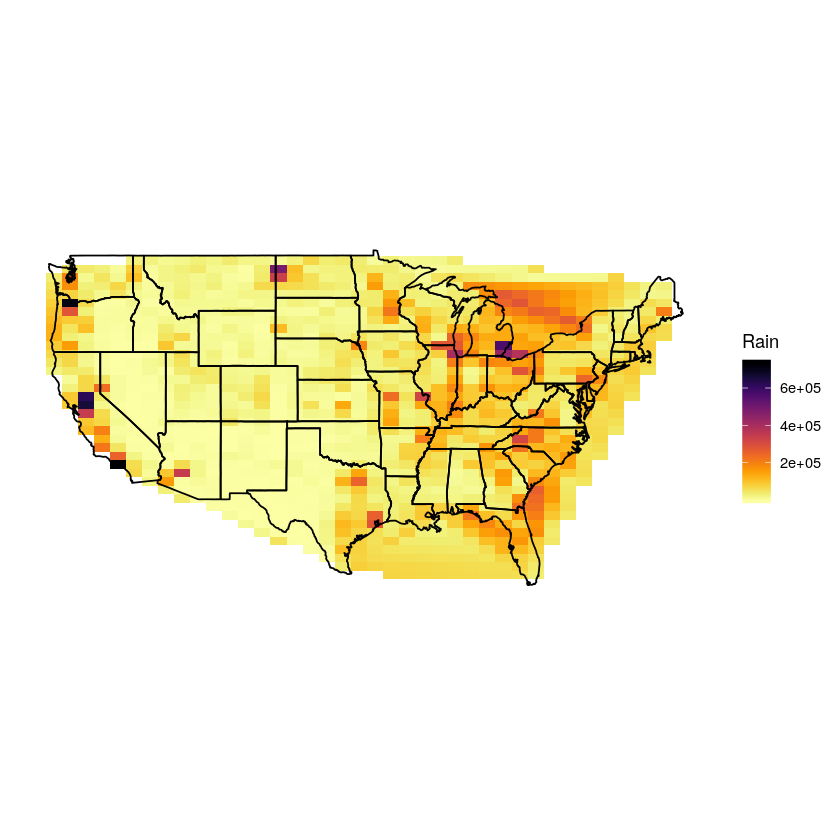

In [41]:
library(akima)
library(reshape2)

fld <- with(sub_grid_df, interp(x = BEGIN_LON, y = BEGIN_LAT, z = DAMAGE_PROPERTY, duplicate = TRUE))

df <- melt(fld$z, na.rm = TRUE)
names(df) <- c("x", "y", "resid")
df$Lon <- fld$x[df$x]
df$Lat <- fld$y[df$y]

ggplot(data = states) + 
  coord_quickmap() +
  geom_tile(data = df, aes(x = Lon, y = Lat, fill = resid)) +
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_fill_viridis(direction = -1, option = 'B') +
  viridis::scale_color_viridis(direction = -1, option = 'B') +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank())

# Kansas

In [7]:
KS <- subset(states, region %in% c("kansas"))

In [8]:
KS_grid_df <- dplyr::filter(sub_grid_df, (min(KS$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(KS$lat) + 1))
KS_grid_df <- dplyr::filter(KS_grid_df, (min(KS$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(KS$long) + 1))

KS_cities_df <- dplyr::filter(sub_cities_df, (min(KS$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(KS$lat) + 1))
KS_cities_df <- dplyr::filter(KS_cities_df, (min(KS$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(KS$long) + 1))

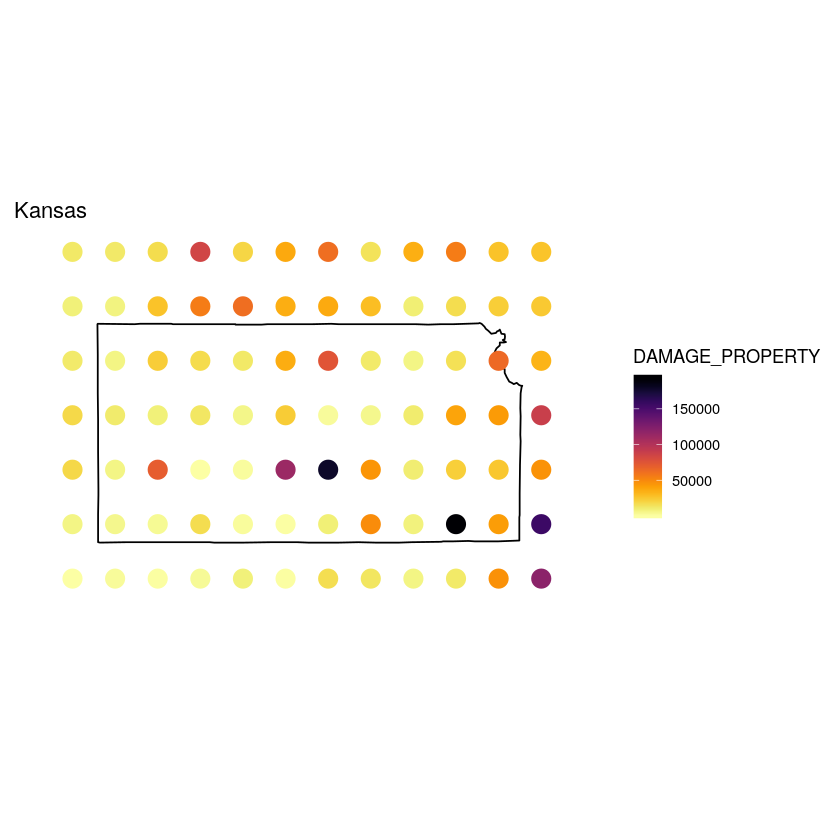

In [9]:
ggplot(data = KS) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = KS_grid_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(KS$long) - 1, max(KS$long) + 1) +
  ylim(min(KS$lat) - 1, max(KS$lat) + 1) +
  labs(title = 'Kansas')

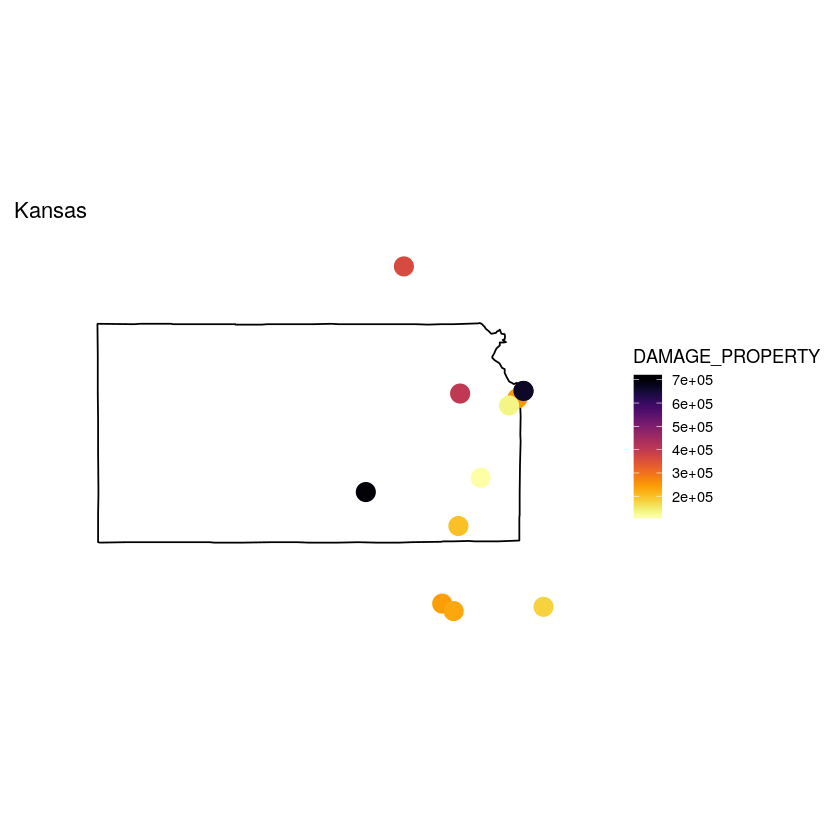

In [10]:
ggplot(data = KS) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = KS_cities_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(KS$long) - 1, max(KS$long) + 1) +
  ylim(min(KS$lat) - 1, max(KS$lat) + 1) +
  labs(title = 'Kansas')

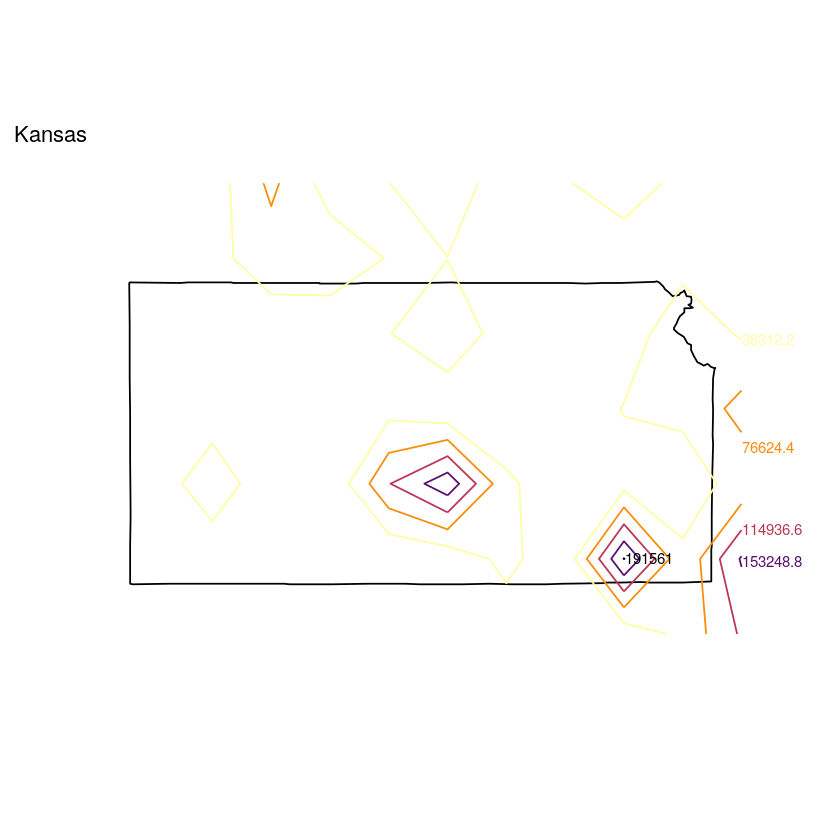

In [11]:
v <- ggplot(data = KS) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  stat_contour(data = KS_grid_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       z = round(DAMAGE_PROPERTY),
                                       colour = ..level..),
               bins = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(KS$long) - 1, max(KS$long) + 1) +
  ylim(min(KS$lat) - 1, max(KS$lat) + 1) +
  labs(title = 'Kansas')



direct.label(v, list('last.bumpup', cex = 0.75, method="bottom.pieces"))

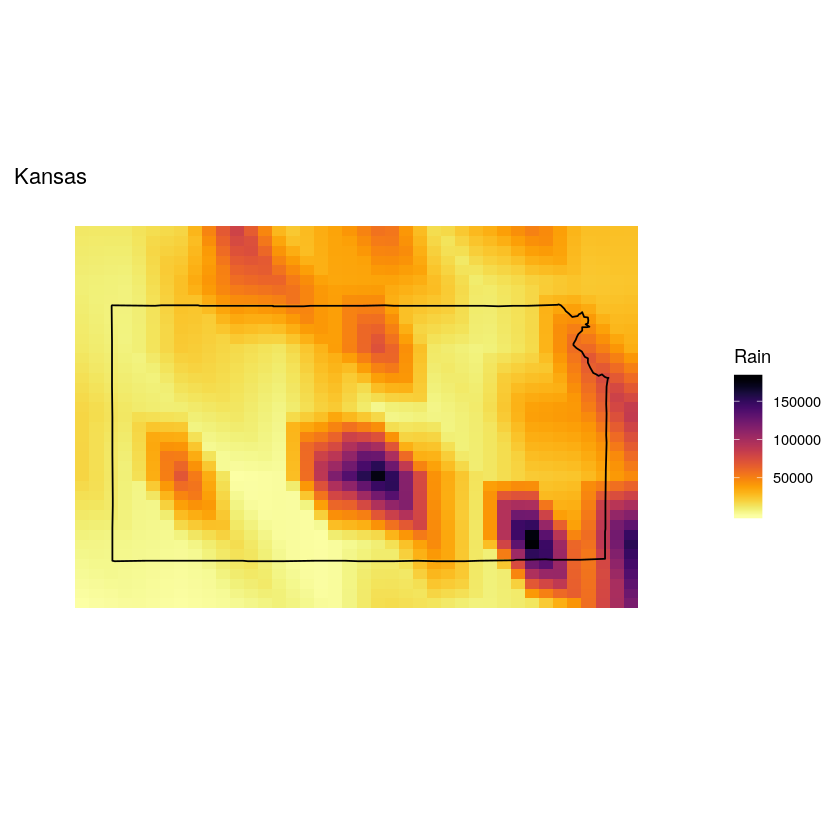

In [44]:
fld <- with(KS_grid_df, interp(x = BEGIN_LON, y = BEGIN_LAT, z = DAMAGE_PROPERTY, duplicate = TRUE))

df <- melt(fld$z, na.rm = TRUE)
names(df) <- c("x", "y", "Rain")
df$Lon <- fld$x[df$x]
df$Lat <- fld$y[df$y]

ggplot(data = KS) + 
  coord_quickmap() +
  geom_tile(data = df, aes(x = Lon, y = Lat, fill = Rain)) +
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_fill_viridis(direction = -1, option = 'B') +
  viridis::scale_color_viridis(direction = -1, option = 'B') +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(KS$long) - 1, max(KS$long) + 1) +
  ylim(min(KS$lat) - 1, max(KS$lat) + 1) +
  labs(title = 'Kansas')

# Illinois

In [12]:
IL <- subset(states, region %in% c("illinois"))

In [13]:
IL_grid_df <- dplyr::filter(sub_grid_df, (min(IL$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(IL$lat) + 1))
IL_grid_df <- dplyr::filter(IL_grid_df, (min(IL$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(IL$long) + 1))

IL_cities_df <- dplyr::filter(sub_cities_df, (min(IL$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(IL$lat) + 1))
IL_cities_df <- dplyr::filter(IL_cities_df, (min(IL$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(IL$long) + 1))

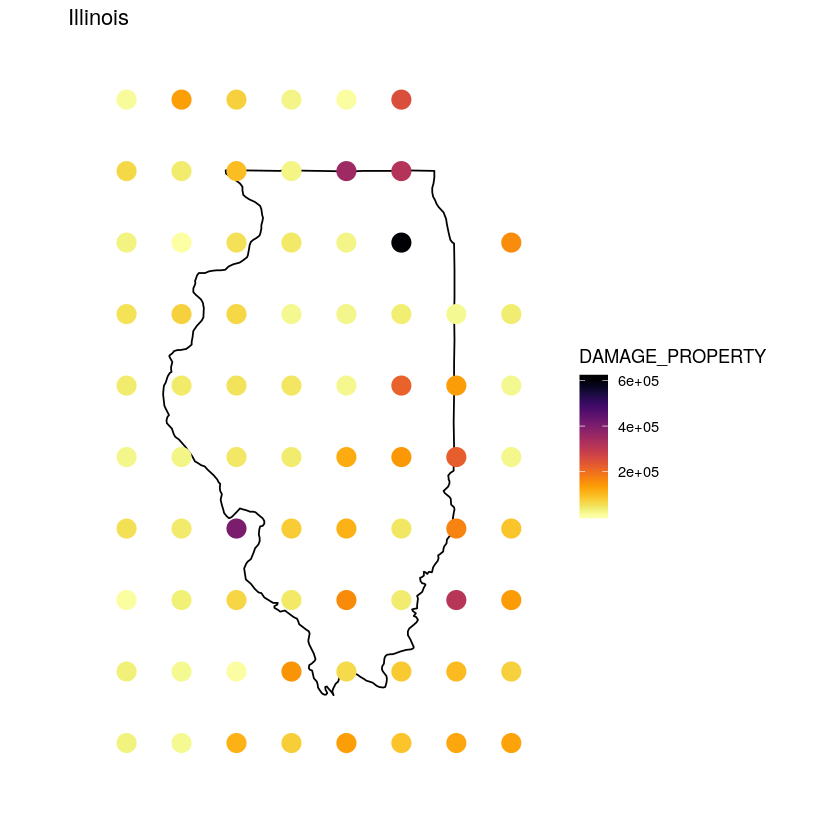

In [14]:
ggplot(data = IL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = IL_grid_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(IL$long) - 1, max(IL$long) + 1) +
  ylim(min(IL$lat) - 1, max(IL$lat) + 1) +
  labs(title = 'Illinois')

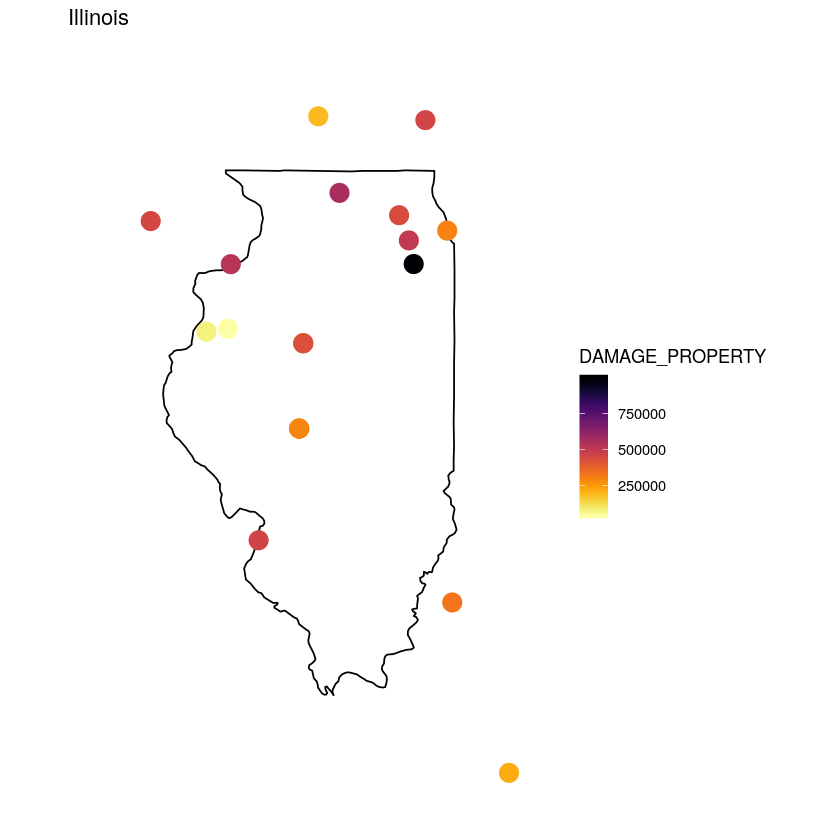

In [15]:
ggplot(data = IL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = IL_cities_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(IL$long) - 1, max(IL$long) + 1) +
  ylim(min(IL$lat) - 1, max(IL$lat) + 1) +
  labs(title = 'Illinois')

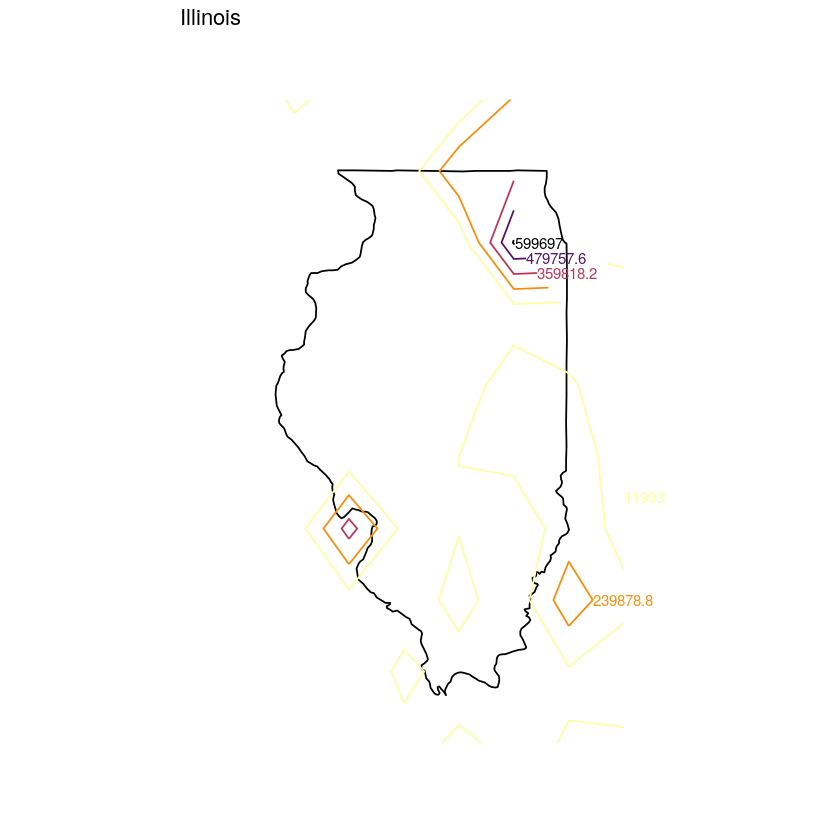

In [16]:
v <- ggplot(data = IL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  stat_contour(data = IL_grid_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       z = round(DAMAGE_PROPERTY),
                                       colour = ..level..),
               bins = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(IL$long) - 1, max(IL$long) + 1) +
  ylim(min(IL$lat) - 1, max(IL$lat) + 1) +
  labs(title = 'Illinois')


direct.label(v, list('last.bumpup', cex = 0.75, method="bottom.pieces"))

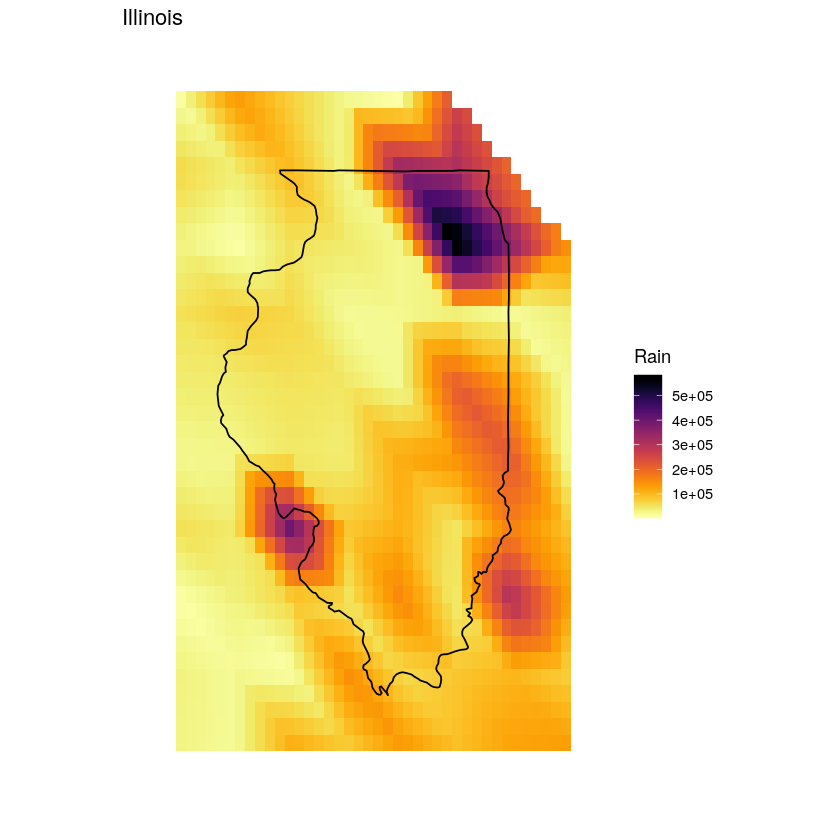

In [45]:
fld <- with(IL_grid_df, interp(x = BEGIN_LON, y = BEGIN_LAT, z = DAMAGE_PROPERTY, duplicate = TRUE))

df <- melt(fld$z, na.rm = TRUE)
names(df) <- c("x", "y", "Rain")
df$Lon <- fld$x[df$x]
df$Lat <- fld$y[df$y]

ggplot(data = IL) + 
  coord_quickmap() +
  geom_tile(data = df, aes(x = Lon, y = Lat, fill = Rain)) +
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_fill_viridis(direction = -1, option = 'B') +
  viridis::scale_color_viridis(direction = -1, option = 'B') +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(IL$long) - 1, max(IL$long) + 1) +
  ylim(min(IL$lat) - 1, max(IL$lat) + 1) +
  labs(title = 'Illinois')

# Alabama

In [17]:
AL <- subset(states, region %in% c("alabama"))

In [18]:
AL_grid_df <- dplyr::filter(sub_grid_df, (min(AL$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(AL$lat) + 1))
AL_grid_df <- dplyr::filter(AL_grid_df, (min(AL$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(AL$long) + 1))

AL_cities_df <- dplyr::filter(sub_cities_df, (min(AL$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(AL$lat) + 1))
AL_cities_df <- dplyr::filter(AL_cities_df, (min(AL$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(AL$long) + 1))

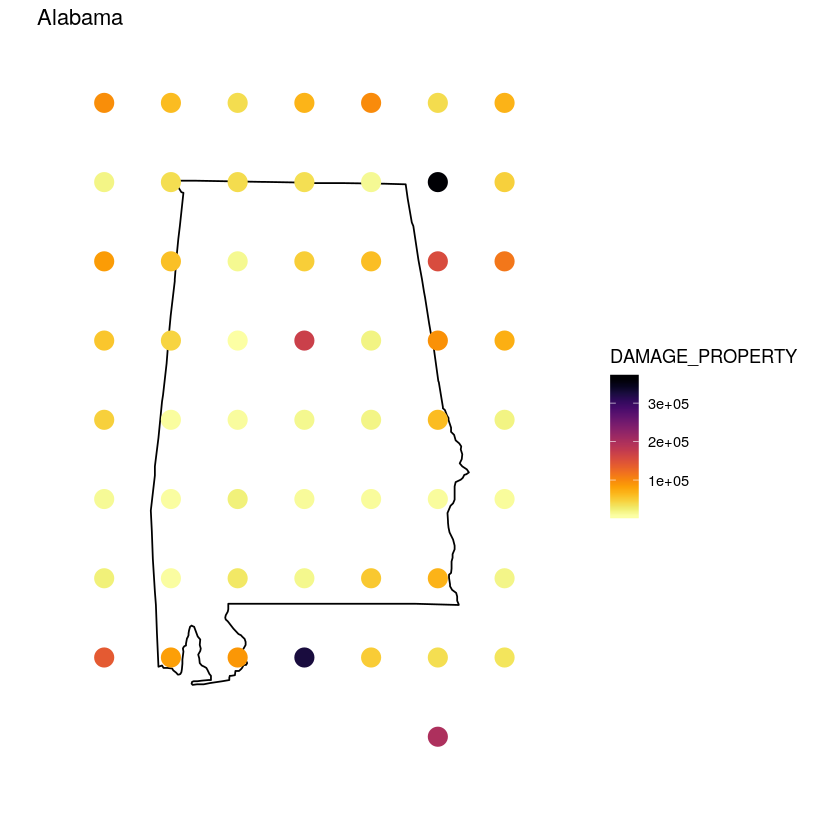

In [19]:
ggplot(data = AL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fALl = FALSE) +
  geom_point(data = AL_grid_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(AL$long) - 1, max(AL$long) + 1) +
  ylim(min(AL$lat) - 1, max(AL$lat) + 1) +
  labs(title = 'Alabama')

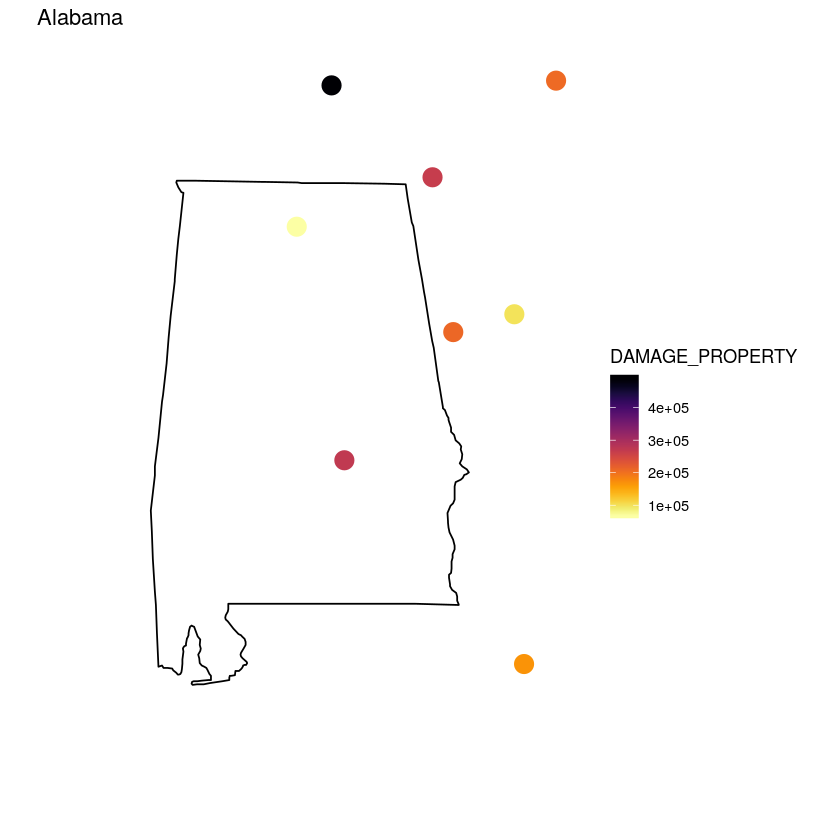

In [20]:
ggplot(data = AL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fALl = FALSE) +
  geom_point(data = AL_cities_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(AL$long) - 1, max(AL$long) + 1) +
  ylim(min(AL$lat) - 1, max(AL$lat) + 1) +
  labs(title = 'Alabama')

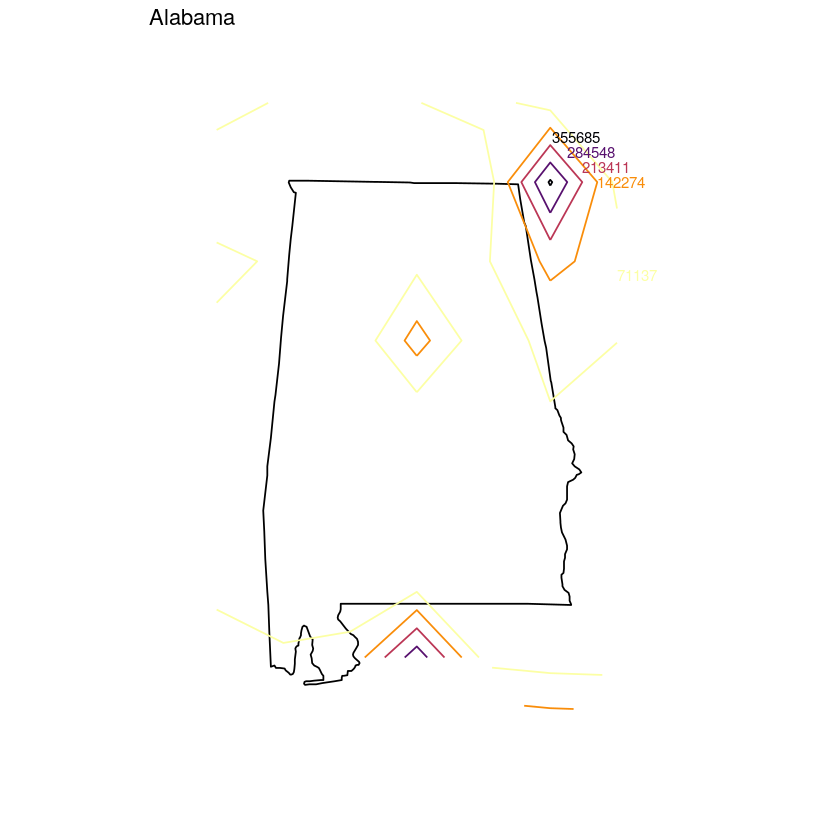

In [21]:
v <- ggplot(data = AL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  stat_contour(data = AL_grid_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       z = round(DAMAGE_PROPERTY),
                                       colour = ..level..),
               bins = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(AL$long) - 1, max(AL$long) + 1) +
  ylim(min(AL$lat) - 1, max(AL$lat) + 1) +
  labs(title = 'Alabama')


direct.label(v, list('last.bumpup', cex = 0.75, method="bottom.pieces"))

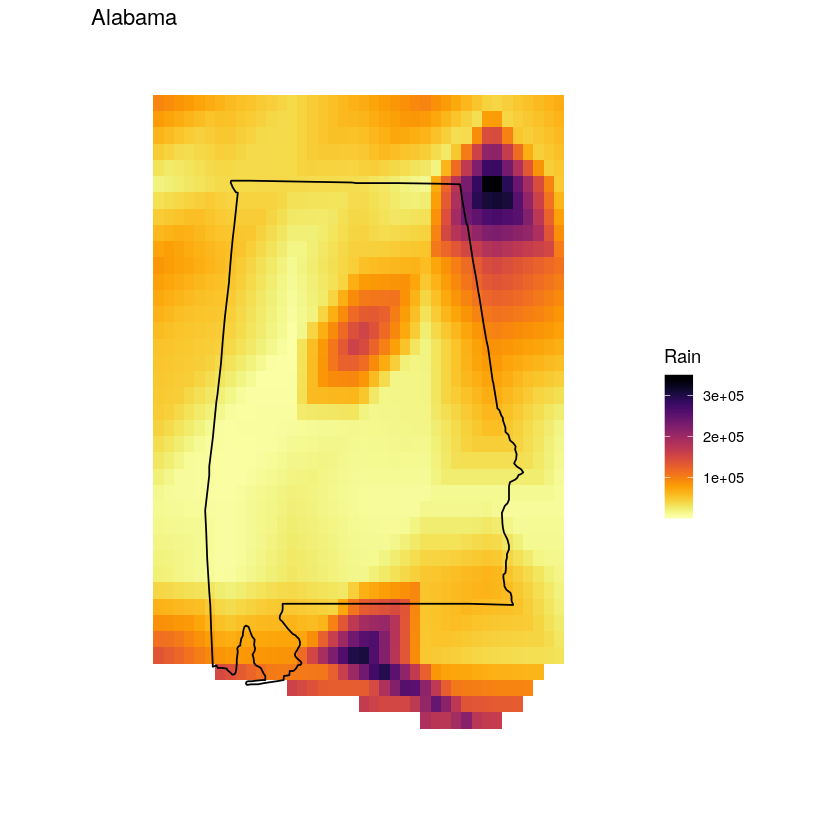

In [46]:
fld <- with(AL_grid_df, interp(x = BEGIN_LON, y = BEGIN_LAT, z = DAMAGE_PROPERTY, duplicate = TRUE))

df <- melt(fld$z, na.rm = TRUE)
names(df) <- c("x", "y", "Rain")
df$Lon <- fld$x[df$x]
df$Lat <- fld$y[df$y]

ggplot(data = AL) + 
  coord_quickmap() +
  geom_tile(data = df, aes(x = Lon, y = Lat, fill = Rain)) +
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_fill_viridis(direction = -1, option = 'B') +
  viridis::scale_color_viridis(direction = -1, option = 'B') +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(AL$long) - 1, max(AL$long) + 1) +
  ylim(min(AL$lat) - 1, max(AL$lat) + 1) +
  labs(title = 'Alabama')

# Tennessee

In [22]:
TN <- subset(states, region %in% c("tennessee"))

In [23]:
TN_grid_df <- dplyr::filter(sub_grid_df, (min(TN$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(TN$lat) + 1))
TN_grid_df <- dplyr::filter(TN_grid_df, (min(TN$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(TN$long) + 1))

TN_cities_df <- dplyr::filter(sub_cities_df, (min(TN$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(TN$lat) + 1))
TN_cities_df <- dplyr::filter(TN_cities_df, (min(TN$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(TN$long) + 1))

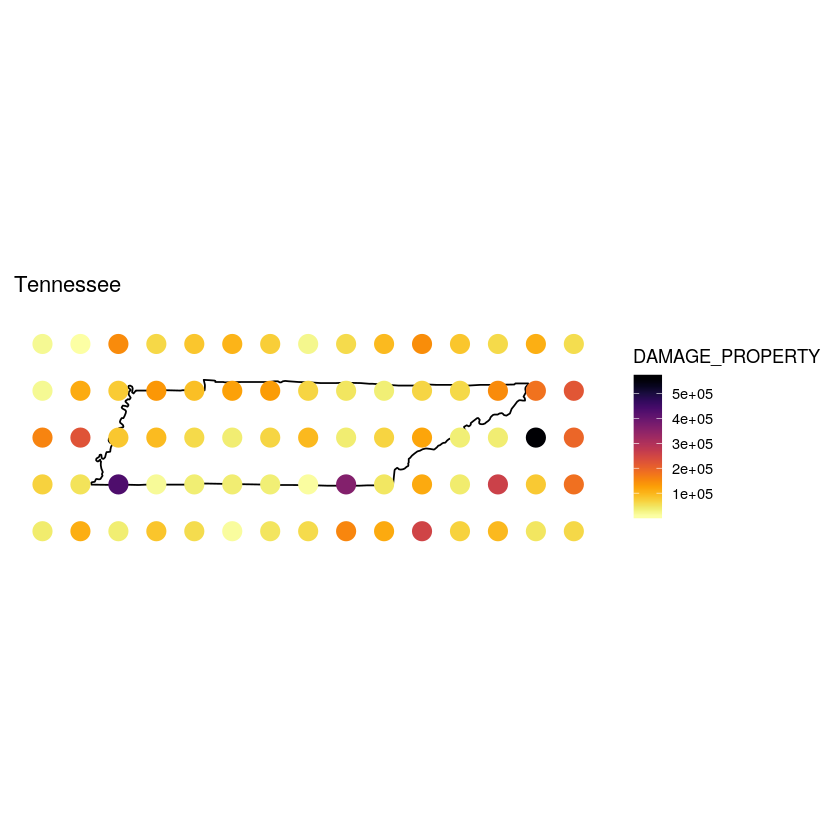

In [24]:
ggplot(data = TN) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = TN_grid_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(TN$long) - 1, max(TN$long) + 1) +
  ylim(min(TN$lat) - 1, max(TN$lat) + 1) +
  labs(title = 'Tennessee')

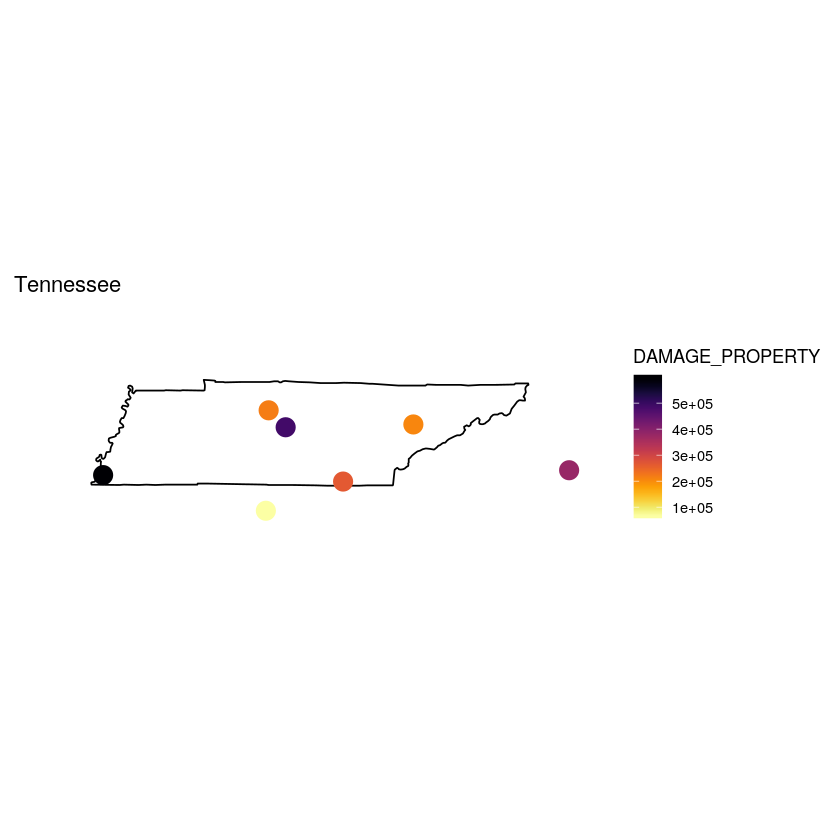

In [25]:
ggplot(data = TN) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = TN_cities_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(TN$long) - 1, max(TN$long) + 1) +
  ylim(min(TN$lat) - 1, max(TN$lat) + 1) +
  labs(title = 'Tennessee')

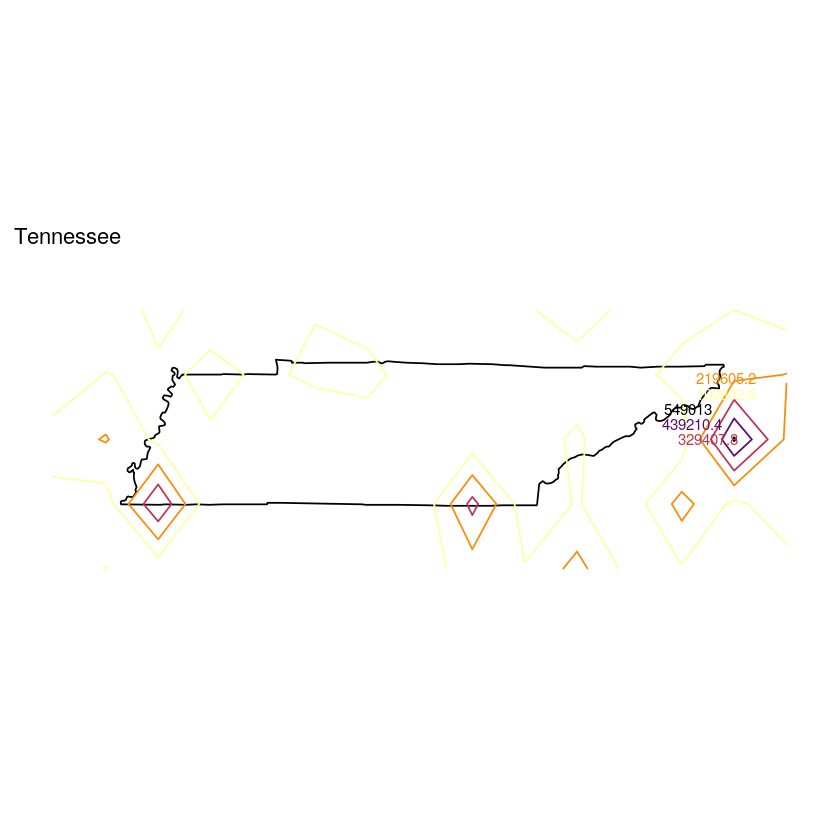

In [26]:
library(directlabels)

v <- ggplot(data = TN) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  stat_contour(data = TN_grid_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       z = round(DAMAGE_PROPERTY),
                                       colour = ..level..),
               bins = 5, lineend = 'round') +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(TN$long) - 1, max(TN$long) + 1) +
  ylim(min(TN$lat) - 1, max(TN$lat) + 1) +
  labs(title = 'Tennessee')
direct.label(v, list('last.bumpup', cex = 0.75, method="bottom.pieces", hjust = 1.5))

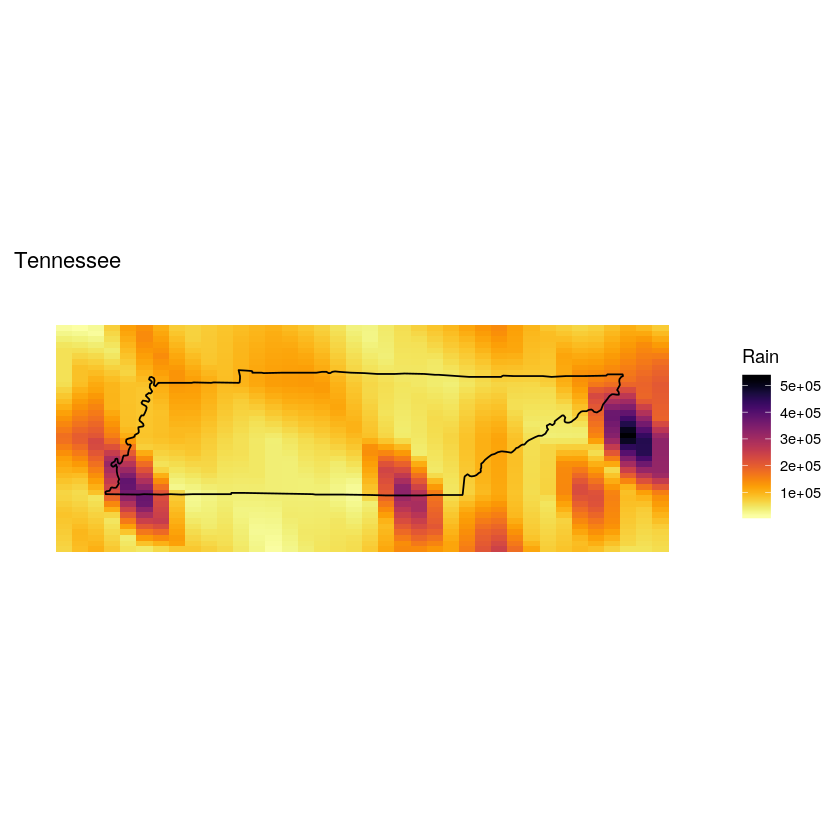

In [47]:
fld <- with(TN_grid_df, interp(x = BEGIN_LON, y = BEGIN_LAT, z = DAMAGE_PROPERTY, duplicate = TRUE))

df <- melt(fld$z, na.rm = TRUE)
names(df) <- c("x", "y", "Rain")
df$Lon <- fld$x[df$x]
df$Lat <- fld$y[df$y]

ggplot(data = TN) + 
  coord_quickmap() +
  geom_tile(data = df, aes(x = Lon, y = Lat, fill = Rain)) +
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_fill_viridis(direction = -1, option = 'B') +
  viridis::scale_color_viridis(direction = -1, option = 'B') +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(TN$long) - 1, max(TN$long) + 1) +
  ylim(min(TN$lat) - 1, max(TN$lat) + 1) +
  labs(title = 'Tennessee')

# Florida

In [27]:
FL <- subset(states, region %in% c("florida"))

In [28]:
FL_grid_df <- dplyr::filter(sub_grid_df, (min(FL$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(FL$lat) + 1))
FL_grid_df <- dplyr::filter(FL_grid_df, (min(FL$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(FL$long) + 1))

FL_cities_df <- dplyr::filter(sub_cities_df, (min(FL$lat) - 1) <= BEGIN_LAT &
                                          BEGIN_LAT <= (max(FL$lat) + 1))
FL_cities_df <- dplyr::filter(FL_cities_df, (min(FL$long) - 1) <= BEGIN_LON &
                                         BEGIN_LON <= (max(FL$long) + 1))

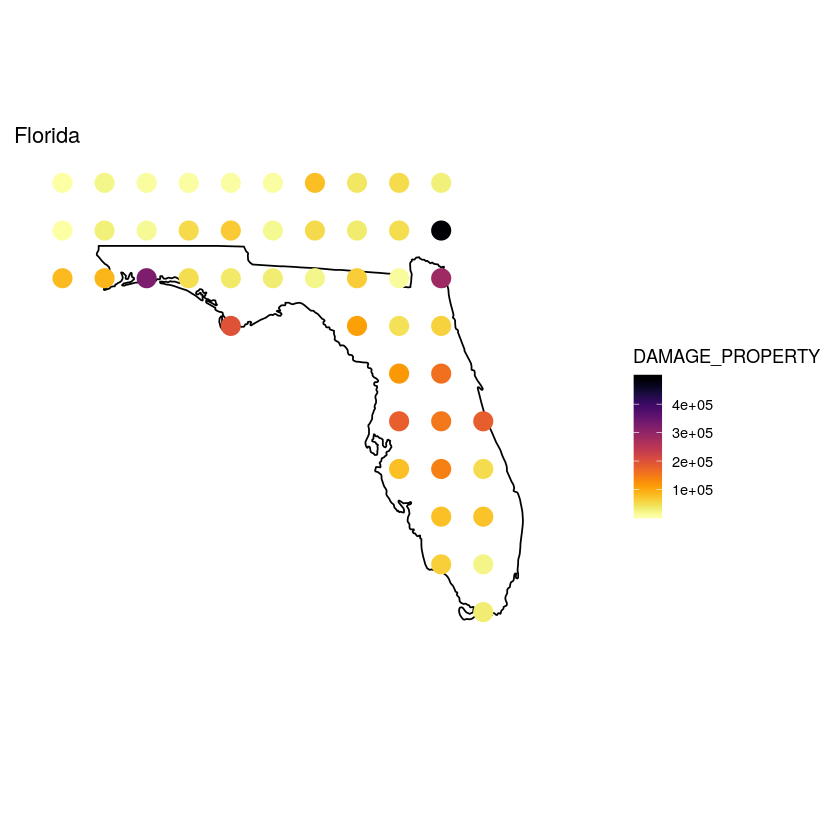

In [29]:
ggplot(data = FL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = FL_grid_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(FL$long) - 1, max(FL$long) + 1) +
  ylim(min(FL$lat) - 1, max(FL$lat) + 1) +
  labs(title = 'Florida')

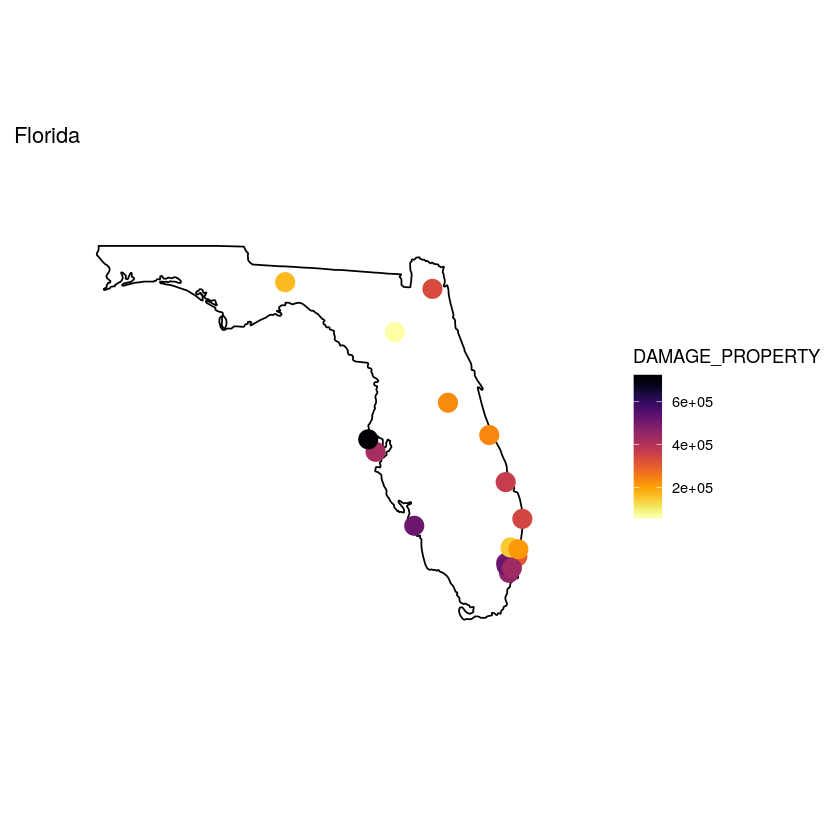

In [30]:
ggplot(data = FL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  geom_point(data = FL_cities_df, aes(x = BEGIN_LON,
                                     y = BEGIN_LAT,
                                     color = DAMAGE_PROPERTY),
               size = 5) +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(FL$long) - 1, max(FL$long) + 1) +
  ylim(min(FL$lat) - 1, max(FL$lat) + 1) +
  labs(title = 'Florida')

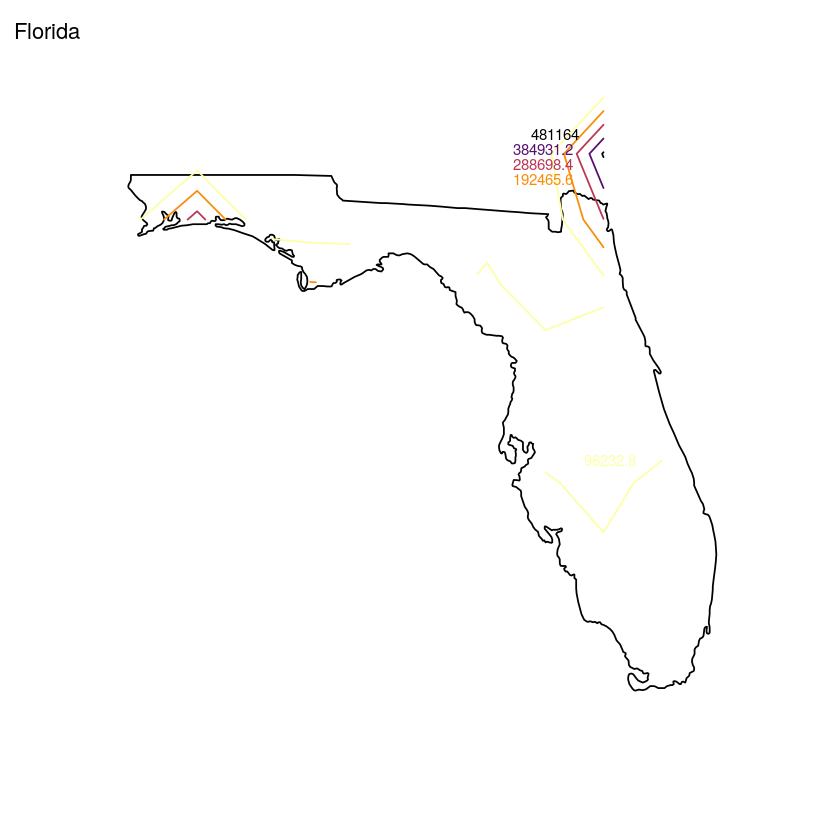

In [31]:
v <- ggplot(data = FL) + 
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_color_viridis(direction = -1, option = 'B') + 
  coord_quickmap() +
  guides(fill = FALSE) +
  stat_contour(data = FL_grid_df, aes(x = BEGIN_LON,
                                       y = BEGIN_LAT,
                                       z = round(DAMAGE_PROPERTY),
                                       colour = ..level..),
               bins = 5, lineend = 'round') +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(FL$long) - 1, max(FL$long) + 1) +
  ylim(min(FL$lat) - 1, max(FL$lat) + 1) +
  labs(title = 'Florida')
direct.label(v, list('last.bumpup', cex = 0.75, method="bottom.pieces", hjust = 1.5))

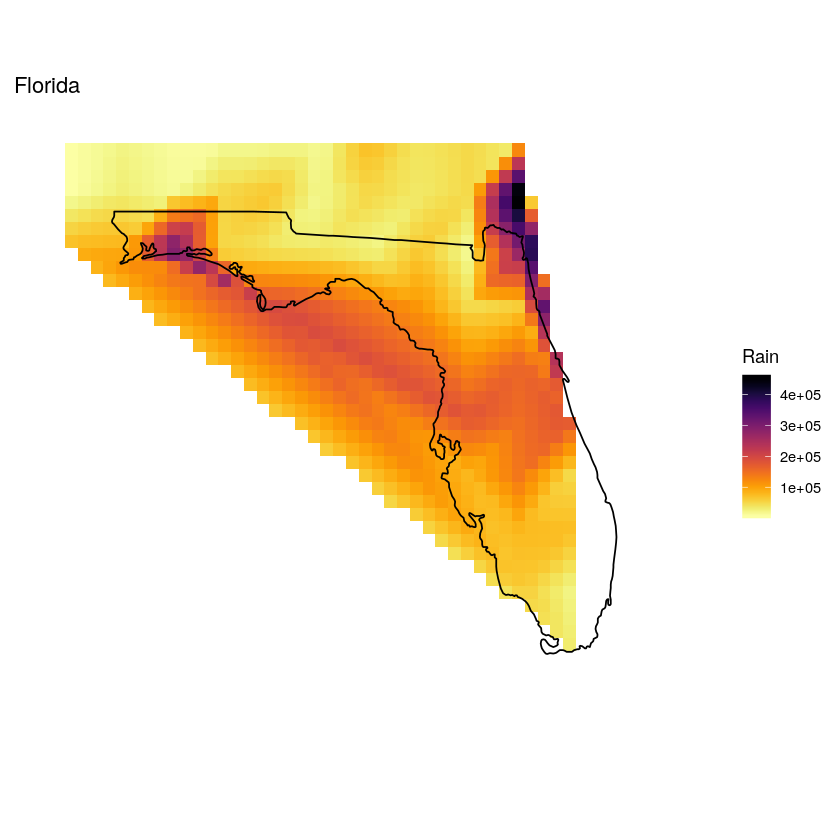

In [48]:
fld <- with(FL_grid_df, interp(x = BEGIN_LON, y = BEGIN_LAT, z = DAMAGE_PROPERTY, duplicate = TRUE))

df <- melt(fld$z, na.rm = TRUE)
names(df) <- c("x", "y", "Rain")
df$Lon <- fld$x[df$x]
df$Lat <- fld$y[df$y]

ggplot(data = FL) + 
  coord_quickmap() +
  geom_tile(data = df, aes(x = Lon, y = Lat, fill = Rain)) +
  geom_polygon(aes(x = long, y = lat, group = group), color = "black", fill = 'NA', lwd = 0.5) +
  viridis::scale_fill_viridis(direction = -1, option = 'B') +
  viridis::scale_color_viridis(direction = -1, option = 'B') +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  xlim(min(FL$long) - 1, max(FL$long) + 1) +
  ylim(min(FL$lat) - 1, max(FL$lat) + 1) +
  labs(title = 'Florida')